# Fake News Analysis and Classifier Using ML (Multinomial Naive Bayes and Deep Learning)

## Data Import, Sense-Checking and Wrangling

In [4]:
# Import libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [5]:
# Import and sense-check the fake and true news data sets:

fake = pd.read_csv('Fake.csv')
true = pd.read_csv('True.csv')

In [6]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [7]:
fake.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


In [8]:
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [9]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [10]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [11]:
true.describe()

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


In [12]:
true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [13]:
fake['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

In [14]:
true['subject'].value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

In [15]:
# The 'subject' column in the data is of little real consequence to the news content's nature (and keeping it as a 
# value in the data set, particularly if used for developing models, could result in overfitting given that the
# true and fake news has been given completely different subject descriptions). As a result, the column will be
# dropped from both dataframes.
# In addition, the date will also be dropped, as this too has little bearing - we want to be able to predict based
# on content and not date:

fake = fake.drop('subject', axis=1)
true = true.drop('subject', axis=1)

fake = fake.drop('date', axis=1)
true = true.drop('date', axis=1)

In [16]:
fake.head()

,title,text
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk..."
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ..."
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...


In [17]:
true.head()

,title,text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...


In [18]:
# New columns are added to each dataframe denoting whether the contents are fake or true:

fake['fake or true'] = 'fake'

fake.head()

,title,text,fake or true
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,fake


In [19]:
true['fake or true'] = 'true'

true.head()

,title,text,fake or true
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,true
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,true
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,true


In [20]:
# The two dataframes are now concatenated into one dataframe:

allnews = pd.concat([fake, true], axis=0)

allnews.head()

,title,text,fake or true
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,fake


## Text Pre-Processing

In [22]:
# Import necessary libraries for text processing and NLP:

import nltk
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')


In [23]:
allnews.shape

(44898, 3)

In [24]:
# Determine if there are any missing values:
allnews['title'].isna().sum()

0

In [25]:
allnews['text'].isna().sum()

0

In [26]:
# Title: Change all to lower case and join with a space:

allnews['title'] = allnews['title'].apply(lambda x: " ".join(x.lower() for x in x.split()))

allnews['title'].head()

0    donald trump sends out embarrassing new year’s...
1    drunk bragging trump staffer started russian c...
2    sheriff david clarke becomes an internet joke ...
3    trump is so obsessed he even has obama’s name ...
4    pope francis just called out donald trump duri...
Name: title, dtype: object

In [27]:
# Text: Change all to lower case and join with a space:

allnews['text'] = allnews['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

allnews['text'].head()

0    donald trump just couldn t wish all americans ...
1    house intelligence committee chairman devin nu...
2    on friday, it was revealed that former milwauk...
3    on christmas day, donald trump announced that ...
4    pope francis used his annual christmas day mes...
Name: text, dtype: object

In [28]:
# Replace all the punctuation in 'title' column:

allnews['title'] = allnews['title'].str.replace('[^\w\s]','', regex=True)

# View output:
allnews['title'].head()

0    donald trump sends out embarrassing new years ...
1    drunk bragging trump staffer started russian c...
2    sheriff david clarke becomes an internet joke ...
3    trump is so obsessed he even has obamas name c...
4    pope francis just called out donald trump duri...
Name: title, dtype: object

In [29]:
# Replace all the punctuation in 'text' column:
allnews['text'] = allnews['text'].str.replace('[^\w\s]','', regex=True)

# View output:
allnews['text'].head()

0    donald trump just couldn t wish all americans ...
1    house intelligence committee chairman devin nu...
2    on friday it was revealed that former milwauke...
3    on christmas day donald trump announced that h...
4    pope francis used his annual christmas day mes...
Name: text, dtype: object

In [30]:
# Merge the two columns into one containing all the relevant text:

allnews['content'] = allnews['title'] + allnews['text']

allnews.head()

,title,text,fake or true,content
0,donald trump sends out embarrassing new years ...,donald trump just couldn t wish all americans ...,fake,donald trump sends out embarrassing new years ...
1,drunk bragging trump staffer started russian c...,house intelligence committee chairman devin nu...,fake,drunk bragging trump staffer started russian c...
2,sheriff david clarke becomes an internet joke ...,on friday it was revealed that former milwauke...,fake,sheriff david clarke becomes an internet joke ...
3,trump is so obsessed he even has obamas name c...,on christmas day donald trump announced that h...,fake,trump is so obsessed he even has obamas name c...
4,pope francis just called out donald trump duri...,pope francis used his annual christmas day mes...,fake,pope francis just called out donald trump duri...


In [31]:
# Check for duplicates in the 'content' column:
allnews.content.duplicated().sum()

5815

In [32]:
# Remove the duplicate rows:

allnews2 = allnews.drop_duplicates(subset=['content'])

# View DataFrame.
allnews2.reset_index()
allnews2.head()


,title,text,fake or true,content
0,donald trump sends out embarrassing new years ...,donald trump just couldn t wish all americans ...,fake,donald trump sends out embarrassing new years ...
1,drunk bragging trump staffer started russian c...,house intelligence committee chairman devin nu...,fake,drunk bragging trump staffer started russian c...
2,sheriff david clarke becomes an internet joke ...,on friday it was revealed that former milwauke...,fake,sheriff david clarke becomes an internet joke ...
3,trump is so obsessed he even has obamas name c...,on christmas day donald trump announced that h...,fake,trump is so obsessed he even has obamas name c...
4,pope francis just called out donald trump duri...,pope francis used his annual christmas day mes...,fake,pope francis just called out donald trump duri...


In [33]:
# Check the duplicates have been removed:

allnews2.shape

(39083, 4)

In [34]:
# Apply tokenisation to the 'content' column:
allnews2['content'] = allnews2['content'].apply(word_tokenize)

# View DataFrame:
allnews2.reset_index()
allnews2.head()

,title,text,fake or true,content
0,donald trump sends out embarrassing new years ...,donald trump just couldn t wish all americans ...,fake,"[donald, trump, sends, out, embarrassing, new,..."
1,drunk bragging trump staffer started russian c...,house intelligence committee chairman devin nu...,fake,"[drunk, bragging, trump, staffer, started, rus..."
2,sheriff david clarke becomes an internet joke ...,on friday it was revealed that former milwauke...,fake,"[sheriff, david, clarke, becomes, an, internet..."
3,trump is so obsessed he even has obamas name c...,on christmas day donald trump announced that h...,fake,"[trump, is, so, obsessed, he, even, has, obama..."
4,pope francis just called out donald trump duri...,pope francis used his annual christmas day mes...,fake,"[pope, francis, just, called, out, donald, tru..."


In [35]:
# Apply lemmatisation to the 'content' column:

lemma = WordNetLemmatizer()

allnews2['content'] = allnews2['content'].apply(
                    lambda x:[lemma.lemmatize(word) for word in x])

# View DataFrame:
allnews2.reset_index()
allnews2.head()

,title,text,fake or true,content
0,donald trump sends out embarrassing new years ...,donald trump just couldn t wish all americans ...,fake,"[donald, trump, sends, out, embarrassing, new,..."
1,drunk bragging trump staffer started russian c...,house intelligence committee chairman devin nu...,fake,"[drunk, bragging, trump, staffer, started, rus..."
2,sheriff david clarke becomes an internet joke ...,on friday it was revealed that former milwauke...,fake,"[sheriff, david, clarke, becomes, an, internet..."
3,trump is so obsessed he even has obamas name c...,on christmas day donald trump announced that h...,fake,"[trump, is, so, obsessed, he, even, ha, obamas..."
4,pope francis just called out donald trump duri...,pope francis used his annual christmas day mes...,fake,"[pope, francis, just, called, out, donald, tru..."


In [36]:
# Apply stemming to the 'content' column - not used, as it strips a bit too much meaning from the news context 
# for this exercise.
# Code would be as below:

#ps = PorterStemmer()

#allnews2['content'] = allnews2['content'].apply(
                    #lambda x:[ps.stem(word) for word in x])

# View DataFrame:
#allnews2.reset_index()
#allnews2.head()

In [37]:
# Remove all the stopwords:

# Create a set of English stopwords:
english_stopwords = set(stopwords.words('english'))

# Create filtered lists of tokens without stopwords:
allnews2['content'] = allnews2['content'].apply(
    lambda words: [word for word in words if word not in english_stopwords])


In [38]:
allnews2.head()

,title,text,fake or true,content
0,donald trump sends out embarrassing new years ...,donald trump just couldn t wish all americans ...,fake,"[donald, trump, sends, embarrassing, new, year..."
1,drunk bragging trump staffer started russian c...,house intelligence committee chairman devin nu...,fake,"[drunk, bragging, trump, staffer, started, rus..."
2,sheriff david clarke becomes an internet joke ...,on friday it was revealed that former milwauke...,fake,"[sheriff, david, clarke, becomes, internet, jo..."
3,trump is so obsessed he even has obamas name c...,on christmas day donald trump announced that h...,fake,"[trump, obsessed, even, ha, obamas, name, code..."
4,pope francis just called out donald trump duri...,pope francis used his annual christmas day mes...,fake,"[pope, francis, called, donald, trump, christm..."


The data is now clean and ready to use and the dataframe is copied/renamed for ease of use.

In [40]:
allnews_clean = allnews2

## Analysis of Fake News Top Words/Topics

In [42]:
# The dataframe is subset to focus only on the fake news:

fake_clean = allnews_clean[allnews_clean['fake or true'] == 'fake']

fake_clean.head()

,title,text,fake or true,content
0,donald trump sends out embarrassing new years ...,donald trump just couldn t wish all americans ...,fake,"[donald, trump, sends, embarrassing, new, year..."
1,drunk bragging trump staffer started russian c...,house intelligence committee chairman devin nu...,fake,"[drunk, bragging, trump, staffer, started, rus..."
2,sheriff david clarke becomes an internet joke ...,on friday it was revealed that former milwauke...,fake,"[sheriff, david, clarke, becomes, internet, jo..."
3,trump is so obsessed he even has obamas name c...,on christmas day donald trump announced that h...,fake,"[trump, obsessed, even, ha, obamas, name, code..."
4,pope francis just called out donald trump duri...,pope francis used his annual christmas day mes...,fake,"[pope, francis, called, donald, trump, christm..."


In [43]:
# Convert the content column from lists to a string in a new DataFrame in order to create a Word Cloud:

fake_content_string = pd.DataFrame(fake_clean['content'].apply(lambda x: ','.join(map(str, x))))

fake_content_string

,content
0,"donald,trump,sends,embarrassing,new,year,eve,m..."
1,"drunk,bragging,trump,staffer,started,russian,c..."
2,"sheriff,david,clarke,becomes,internet,joke,thr..."
3,"trump,obsessed,even,ha,obamas,name,coded,websi..."
4,"pope,francis,called,donald,trump,christmas,spe..."
...,...
22698,"white,house,theatrics,gun,control21st,century,..."
22699,"activist,terrorist,medium,control,dictate,narr..."
22700,"boiler,room,surrender,retreat,head,roll,ep,38t..."
22701,"federal,showdown,loom,oregon,blm,abuse,local,r..."


In [44]:
# The dataframe is replaced with a new one, with the index reset (vital step):

fake_content_string = fake_content_string.reset_index()

In [45]:
# The text is put into a continuous string (essential for the wordcloud):

all_tokens_fake = ''

for i in range(fake_content_string.shape[0]):
    # Add each token to the list:
    all_tokens_fake = all_tokens_fake + fake_content_string['content'][i]

In [46]:
# Create a Word Cloud:

wordcloud_fake = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='viridis', min_font_size = 10).generate(all_tokens_fake)

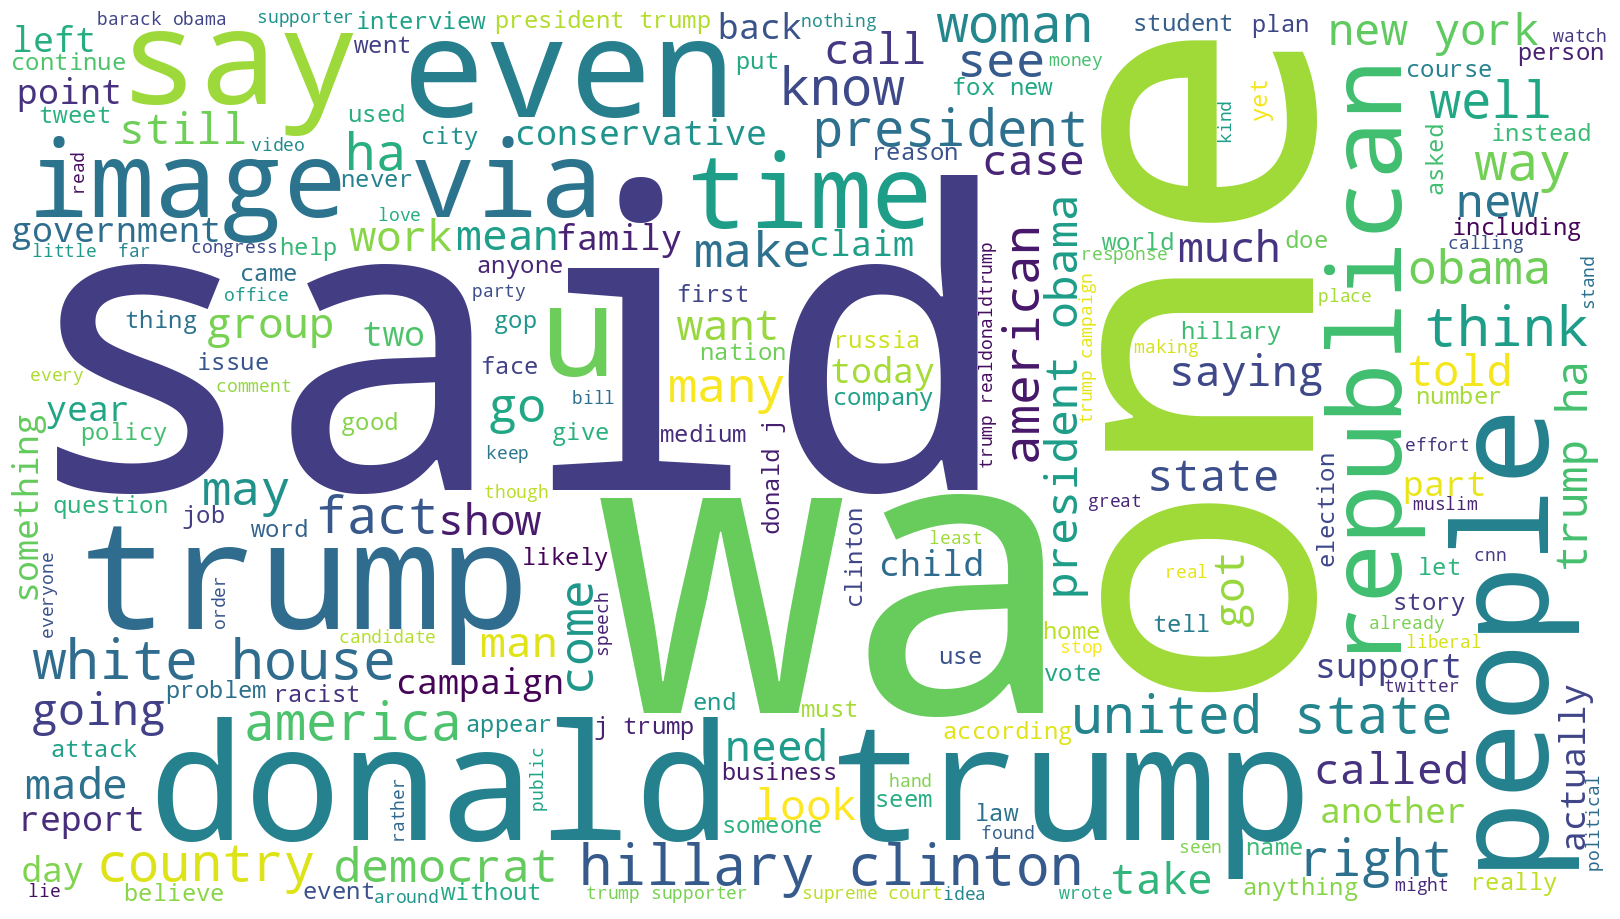

In [47]:
# Plot the wordcloud image:

plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud_fake) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.savefig("fake_wordcloud.png", format="png")
plt.show()

In [48]:
# The gensim library is imported, so that a Latent Dirichlet Allocation (LDA) model can be used to find the top
# topics appearing in the fake news:

import gensim
from gensim import corpora

In [49]:
# Define the dictionary:
dictionary = corpora.Dictionary(fake_clean['content'])

# Define the corpus:
corpus = [dictionary.doc2bow(text) for text in fake_clean['content']]

# Print corpus and dictionary:
print(dictionary)
print(corpus)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [50]:
# Define the LDA model:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=5)

# Save the topics and top 5 words:
topics = ldamodel.print_topics(num_words=5)

# Print the results:
for topic in topics:
    print(topic)

(0, '0.012*"food" + 0.009*"bundy" + 0.008*"federal" + 0.008*"worker" + 0.007*"carson"')
(1, '0.017*"wa" + 0.007*"said" + 0.006*"police" + 0.005*"people" + 0.005*"ha"')
(2, '0.037*"trump" + 0.012*"wa" + 0.008*"donald" + 0.007*"president" + 0.007*"ha"')
(3, '0.010*"ha" + 0.009*"wa" + 0.008*"u" + 0.008*"trump" + 0.007*"clinton"')
(4, '0.013*"fbi" + 0.012*"court" + 0.010*"state" + 0.009*"law" + 0.009*"federal"')


In [51]:
# Import libraries to use the pyLDAvis visualisation tool to look at topics:

import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()



In [52]:
# Generate the visualisation tool using the previously-generated corpus and dictionary:

lda_display = pyLDAvis.gensim_models.prepare(ldamodel, corpus,
                          dictionary, sort_topics=False)

lda_display

/Users/Claire/opt/anaconda3/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1841: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.351291 -0.092626       1        1   1.286453
1     -0.120462 -0.018542       2        1  26.286325
2     -0.157040 -0.125563       3        1  28.312463
3     -0.119035  0.000756       4        1  37.275377
4      0.045245  0.235974       5        1   6.839381, topic_info=            Term          Freq         Total Category  logprob  loglift
152        trump  58587.000000  58587.000000  Default  30.0000  30.0000
288        state  15578.000000  15578.000000  Default  29.0000  29.0000
1861  government   7228.000000   7228.000000  Default  28.0000  28.0000
222          fbi   4147.000000   4147.000000  Default  27.0000  27.0000
1095     federal   3908.000000   3908.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
262        order   1085.634178   3147.305881   Topic5  -5.6152   1.6181
1861  government   1437.384724   7228.093811   Topic5  -5.3345   1.0673
1491     general    977.636355   2544.007181   Topic5  -5.7199   1.7261
299           wa   1678.173451  49990.322632   Topic5  -5.1796  -0.7117
280         said    974.046789  23194.862336   Topic5  -5.7236  -0.4878

[444 rows x 6 columns], token_table=       Topic      Freq                 Term
term                                       
55680      3  0.993545  2016realdonaldtrump
29067      3  0.999233  2017realdonaldtrump
60335      1  0.981763                  395
2170       1  0.000992             abortion
2170       2  0.060511             abortion
...      ...       ...                  ...
169        1  0.004235                 year
169        2  0.286177                 year
169        3  0.133988                 year
169        4  0.503783                 year
169        5  0.071815                 year

[1036 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5])

In [53]:
# Output the visualisation to html to access outside of Jupyter Notebook:

pyLDAvis.save_html(lda_display, 'fake_topics_ldavis.html')

## Multinomial Naive Bayes Classifier

In [55]:
# Import required libraries:

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import RocCurveDisplay

In [56]:
# Convert the content column from lists to a string:

allnews_clean['content'] = allnews_clean['content'].apply(lambda x: ','.join(map(str, x)))

allnews_clean.head()

,title,text,fake or true,content
0,donald trump sends out embarrassing new years ...,donald trump just couldn t wish all americans ...,fake,"donald,trump,sends,embarrassing,new,year,eve,m..."
1,drunk bragging trump staffer started russian c...,house intelligence committee chairman devin nu...,fake,"drunk,bragging,trump,staffer,started,russian,c..."
2,sheriff david clarke becomes an internet joke ...,on friday it was revealed that former milwauke...,fake,"sheriff,david,clarke,becomes,internet,joke,thr..."
3,trump is so obsessed he even has obamas name c...,on christmas day donald trump announced that h...,fake,"trump,obsessed,even,ha,obamas,name,coded,websi..."
4,pope francis just called out donald trump duri...,pope francis used his annual christmas day mes...,fake,"pope,francis,called,donald,trump,christmas,spe..."


In [57]:
# Change the target variable ('fake' and 'true') to numerical values 0 and 1:

le = LabelEncoder()
allnews_clean['fake or true'] = le.fit_transform(allnews_clean['fake or true'])

allnews_clean.head()

,title,text,fake or true,content
0,donald trump sends out embarrassing new years ...,donald trump just couldn t wish all americans ...,0,"donald,trump,sends,embarrassing,new,year,eve,m..."
1,drunk bragging trump staffer started russian c...,house intelligence committee chairman devin nu...,0,"drunk,bragging,trump,staffer,started,russian,c..."
2,sheriff david clarke becomes an internet joke ...,on friday it was revealed that former milwauke...,0,"sheriff,david,clarke,becomes,internet,joke,thr..."
3,trump is so obsessed he even has obamas name c...,on christmas day donald trump announced that h...,0,"trump,obsessed,even,ha,obamas,name,coded,websi..."
4,pope francis just called out donald trump duri...,pope francis used his annual christmas day mes...,0,"pope,francis,called,donald,trump,christmas,spe..."


In [58]:
# Set the variables:
X = allnews_clean['content']
y = allnews_clean['fake or true']

In [59]:
# Split the data into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [60]:
# Create a CountVectorizer to convert text data into numerical features (i.e. Bag of Words):

vectorizer = CountVectorizer(ngram_range=(1,3))

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [61]:
# Train a Multinomial Naive Bayes classifier:

# Build the model:
mnb = MultinomialNB()

# Fit the model:
mnb.fit(X_train_vec, y_train)

# Run the model and obtain metrics:
training_preds = mnb.predict(X_train_vec)
preds = mnb.predict(X_test_vec)
probs = mnb.predict_proba(X_test_vec)

In [62]:
# Print out the metrics and classification report to evaluate the performance of the model:

print(metrics.accuracy_score(y_train, training_preds))
print(metrics.accuracy_score(y_test, preds))
print(classification_report(y_test, preds))
print(roc_auc_score(y_test, probs[:,1]))

0.9993786095474816
0.9649466950959489
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      5357
           1       0.95      0.99      0.97      6368

    accuracy                           0.96     11725
   macro avg       0.97      0.96      0.96     11725
weighted avg       0.97      0.96      0.96     11725

0.9776127112133375


In [63]:
# Plot a confusion matrix to visualise actuals vs. predictions:

confusion_matrix = confusion_matrix(y_test, preds)

confusion = pd.DataFrame(confusion_matrix, index=['is_fake', 'is_true'],
                         columns=['predicted_fake', 'predicted_true'])

# View the output:
confusion

,predicted_fake,predicted_true
is_fake,5010,347
is_true,64,6304


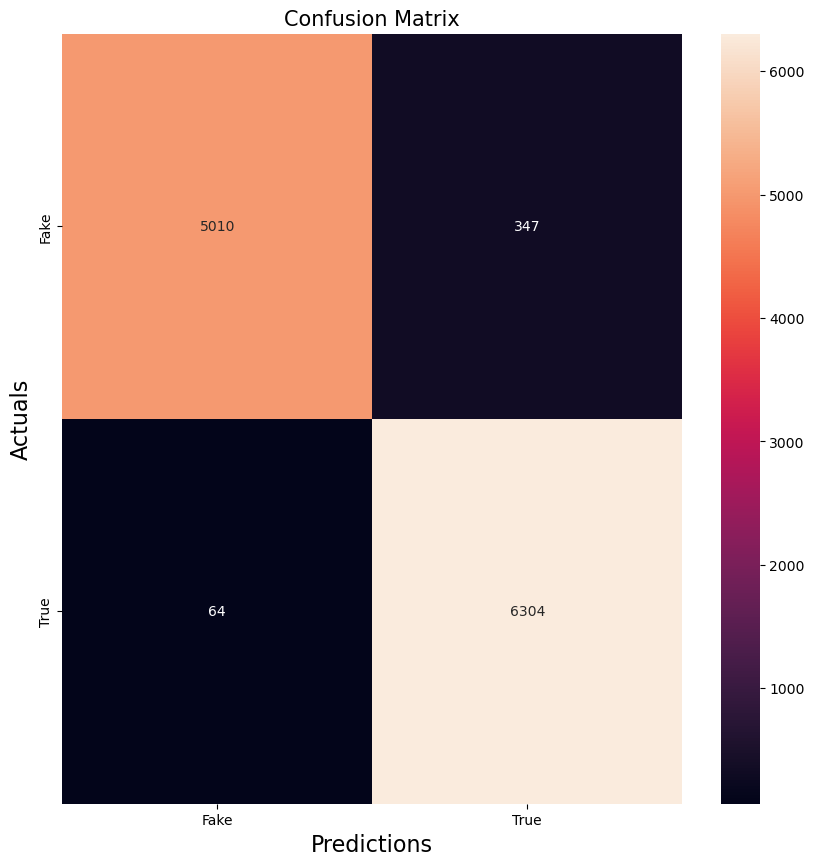

In [64]:
# Plot the confusion_matrix using Seaborn:

fig, ax = plt.subplots(figsize=(10, 10))
ax.grid(False)

sns.heatmap(confusion_matrix, annot=True, fmt='g')

ax.set_xticklabels(['Fake', 'True'])
ax.set_yticklabels(['Fake', 'True'])
plt.xlabel('Predictions', fontsize=16)
plt.ylabel('Actuals', fontsize=16)
plt.title('Confusion Matrix', fontsize=15)

fig.savefig('confusion_matrix.png')

In [65]:
# Plot a Reciever Operating Characteristic (ROC) Curve to compare the false positive rate against the true positive rate (i.e. correct
# predictions):

fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

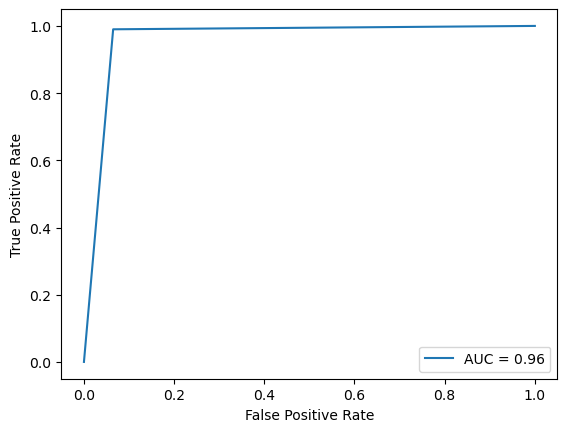

In [66]:
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()

plt.show()

The model appears to be pretty accurate at 96% accuracy. However, there were 346 cases of fake news predicted as true. Therefore, randomised search cross valdation will be used to try to improve on the model and reduce these false positives.

In [68]:
# Check what hyperparameter values the model applied as default:

print(mnb.get_params())

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}


In [69]:
# Import libraries to carry out cross-validation and optimisation of the model:

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, make_scorer


In [70]:
# Set hyperparameter ranges to perform random search cross validation:

param_dist = {"alpha": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6],
              "fit_prior": [True, False]}


In [71]:
# Create an accuracy scorer:
accuracy = make_scorer(accuracy_score)

# Finalise the random search (which includes K-Fold cross validation with a value of 10):
rs = RandomizedSearchCV(
  estimator=mnb, param_distributions=param_dist,
  scoring = accuracy,
  cv=10, n_iter=10, random_state=42)

# Fit the randomised search:
rs.fit(X_train_vec, y_train)


/Users/Claire/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:314: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  yield param_grid[i]
/Users/Claire/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:314: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  yield param_grid[i]
/Users/Claire/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:314: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  yield param_grid[i]
/Users/Claire/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:314: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  yield param_grid[i]
/Users/Claire/opt/anaconda3/

RandomizedSearchCV(cv=10, estimator=MultinomialNB(),
                   param_distributions={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                                  0.7, 0.8, 0.9, 1, 2, 3, 4, 5,
                                                  6],
                                        'fit_prior': [True, False]},
                   random_state=42, scoring=make_scorer(accuracy_score))

In [72]:
# View the results:

rs.cv_results_

{'mean_fit_time': array([1.01047668, 1.02006192, 0.95941238, 0.97725937, 0.92069261,
        0.93605878, 1.06520216, 1.2734365 , 1.22738442, 1.3416332 ]),
 'std_fit_time': array([0.10676219, 0.05729261, 0.04266671, 0.07373029, 0.03765428,
        0.04489125, 0.1092764 , 0.40185732, 0.33957991, 0.19645233]),
 'mean_score_time': array([0.19592853, 0.19734113, 0.19147234, 0.18382621, 0.17988884,
        0.18680208, 0.24619131, 0.23333359, 0.24991429, 0.23675842]),
 'std_score_time': array([0.00874431, 0.01005321, 0.0188284 , 0.00902851, 0.00877615,
        0.01043816, 0.0736298 , 0.11039211, 0.07423205, 0.05395383]),
 'param_fit_prior': masked_array(data=[False, False, False, False, True, False, True, True,
                    True, True],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_alpha': masked_array(data=[5, 0.8, 3, 0.9, 0.5, 0.5, 6, 4, 0.7, 0.1],
            

In [73]:
# View the best accuracy score:

rs.best_score_

0.9731338400846724

In [74]:
# View the hyperparameter values of the best model:

rs.best_params_

{'fit_prior': True, 'alpha': 0.1}

In [75]:
# View the best model:

rs.best_estimator_

MultinomialNB(alpha=0.1)

In [76]:
# Build a new optimised model:
mnb2 = MultinomialNB(alpha=0.1, fit_prior=True)

# Fit the model:
mnb2.fit(X_train_vec, y_train)

# Run the model and obtain metrics:
training_preds2 = mnb2.predict(X_train_vec)
preds2 = mnb2.predict(X_test_vec)
probs2 = mnb2.predict_proba(X_test_vec)

In [77]:
print(metrics.accuracy_score(y_train, training_preds2))
print(metrics.accuracy_score(y_test, preds2))
print(classification_report(y_test, preds2))
print(roc_auc_score(y_test, probs2[:,1]))

1.0
0.972366737739872
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      5357
           1       0.96      0.99      0.97      6368

    accuracy                           0.97     11725
   macro avg       0.97      0.97      0.97     11725
weighted avg       0.97      0.97      0.97     11725

0.981729805927153


In [78]:
# Plot a confusion matrix to visualise actuals vs. predictions:

from sklearn.metrics import confusion_matrix

confusion_matrix2 = confusion_matrix(y_test, preds2)

confusion2 = pd.DataFrame(confusion_matrix2, index=['is_fake', 'is_true'],
                         columns=['predicted_fake', 'predicted_true'])

# View the output:
confusion2

,predicted_fake,predicted_true
is_fake,5121,236
is_true,88,6280


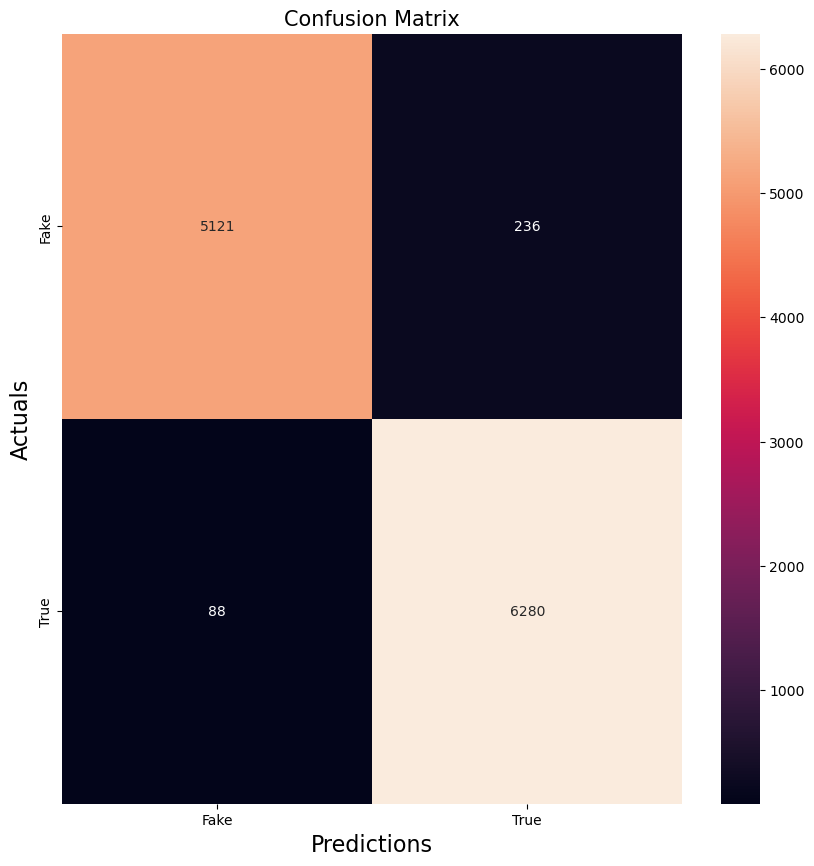

In [79]:
# Plot the confusion_matrix using Seaborn:

fig, ax = plt.subplots(figsize=(10, 10))
ax.grid(False)

sns.heatmap(confusion_matrix2, annot=True, fmt='g')

ax.set_xticklabels(['Fake', 'True'])
ax.set_yticklabels(['Fake', 'True'])
plt.xlabel('Predictions', fontsize=16)
plt.ylabel('Actuals', fontsize=16)
plt.title('Confusion Matrix', fontsize=15)

fig.savefig('confusion_matrix_best.png')

Although this model makes fewer true positive predictions (predicting true news correctly as true), it is correctly predicting more fake news correctly as fake - this tradeoff means we avoid missing some fake news. The model captures 110 more fake news articles than the original model and has an accuracy of 97%.

## Deep Learning: Neural Network for Text Classification

In [94]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping

from numpy import unique

/Users/Claire/opt/anaconda3/lib/python3.9/site-packages/tensorflow/python/framework/dtypes.py:35: DeprecationWarning: ml_dtypes.float8_e4m3b11 is deprecated. Use ml_dtypes.float8_e4m3b11fnuz
  from tensorflow.tsl.python.lib.core import pywrap_ml_dtypes


In [96]:
# Fix random seed for reproducibility:
tf.random.set_seed(7)

In [97]:
# Implement the tokenizer on the text to convert it into numerical values:

tokenizer = Tokenizer(num_words=50000)
tokenizer.fit_on_texts(X_train)

X_train_tok = tokenizer.texts_to_sequences(X_train)
X_test_tok = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

print(X_train_tok[2])
print(X_train[2])

[1, 426, 2653, 71, 1148, 1817, 197, 15, 426, 2653, 1, 355, 132, 2265, 9, 68, 96, 19, 1, 4, 780, 1148, 16854, 2238, 197, 402, 9, 57, 762, 1, 678, 1817, 13705, 104, 1155, 197, 39, 1286, 1886, 23, 64, 19097, 30203, 389, 80, 123, 8288, 447, 1379, 2, 1817, 1, 19098, 737, 131, 187, 7178, 116, 1805, 9623, 603, 197, 82, 57, 762, 1016, 12, 451]
2    senior,u,republican,senator,let,mr,mueller,job...
2    sheriff,david,clarke,becomes,internet,joke,thr...
Name: content, dtype: object


In [98]:
# Define the maximum row length the model should work on.
# Pad out unused spaces at the end of the text with zeros so all rows are the same length:

maxlen = 1000

X_train_tok = pad_sequences(X_train_tok, padding='post', maxlen=maxlen)
X_test_tok = pad_sequences(X_test_tok, padding='post', maxlen=maxlen)

print(X_train_tok[0, :])

[ 4742  5806     1  1977  2553   385   180    45  6163  3390   451    19
     1   922  1786   100  2566  1210   385     7   322    13   466   513
   300  1807 12984  2221     2   348   466   513     3   421   100  4743
  1210   385     4   833    45   601     1     4   404  1977  4982   100
     8   180   700  1194   949  1243  9344  4817 15242    41   128  1210
   385   514     7   549  6072    27     6 11643  1727  1493   100   195
   779   385  1970  2382   167  1863    19     1   310   911     4   701
     3 10642   167  7895    19     1     8     4  6705   338  2553    19
    18  1526  1109   338   442     3  1804  1513    60  1055    18   462
  1576    19     1   322     8  4489   194   685  3797  3678   496    36
   288  1532   184     1    25    18   184    25  2687    33    10   660
  1574    46  1038   909    21  2205    19     1   656   700  9620  2767
  2593   442   923  4058   416   757  8025 22333   512  1624  1653    86
    73     8     1  1235   385     2   142    21   

In [99]:
# Build the model infrastructure using embedding and LSTM layers, plus a dense output layer.
# The LSTM layer has 64 nodes.
# The activation functions tanh and sigmoid are used as this is a binary classification problem:

model = Sequential()

model.add(Embedding(input_dim=vocab_size, # the input dimensions
                           output_dim=32, # the max length of any word in the dataset
                           input_length=maxlen)) # the max length of each row in the dataset
model.add(LSTM(64, activation='tanh', dropout=0.5, recurrent_dropout=0.2, return_sequences=True))
model.add(Dense(1, activation='sigmoid'))


In [100]:
# Compile the model:

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 32)          6127200   
                                                                 
 lstm (LSTM)                 (None, 1000, 64)          24832     
                                                                 
 dense (Dense)               (None, 1000, 1)           65        
                                                                 
Total params: 6152097 (23.47 MB)
Trainable params: 6152097 (23.47 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [101]:
# Define early_stopping_monitor.
# The model stops training when accuracy has not improved for two epochs:

early_stopping_monitor = EarlyStopping(patience=2)

In [102]:
# Fit the model and store in a variable called 'history':

history = model.fit(X_train_tok,
          y_train,
          epochs=20,
          batch_size=64,
          validation_split=0.3,
          callbacks=[early_stopping_monitor],
          verbose=True)

Epoch 1/20
300/300 [==============================] - 433s 1s/step - loss: 0.3836 - accuracy: 0.7993 - val_loss: 0.1228 - val_accuracy: 0.9730
Epoch 2/20
300/300 [==============================] - 2568s 9s/step - loss: 0.0822 - accuracy: 0.9836 - val_loss: 0.0869 - val_accuracy: 0.9825
Epoch 3/20
300/300 [==============================] - 494s 2s/step - loss: 0.0523 - accuracy: 0.9905 - val_loss: 0.0772 - val_accuracy: 0.9850
Epoch 4/20
300/300 [==============================] - 482s 2s/step - loss: 0.0324 - accuracy: 0.9944 - val_loss: 0.0781 - val_accuracy: 0.9860
Epoch 5/20
300/300 [==============================] - 481s 2s/step - loss: 0.0205 - accuracy: 0.9965 - val_loss: 0.0744 - val_accuracy: 0.9869
Epoch 6/20
300/300 [==============================] - 461s 2s/step - loss: 0.0410 - accuracy: 0.9926 - val_loss: 0.1067 - val_accuracy: 0.9794
Epoch 7/20
300/300 [==============================] - 478s 2s/step - loss: 0.0211 - accuracy: 0.9964 - val_loss: 0.1167 - val_accuracy: 0.980

In [103]:
# Evaluate the performance of the model on the train data.
# Then evaluate on the unseen test data:

loss, accuracy = model.evaluate(X_train_tok, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))

loss, accuracy = model.evaluate(X_test_tok, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))


Training Accuracy: 0.9931
Testing Accuracy:  0.9824


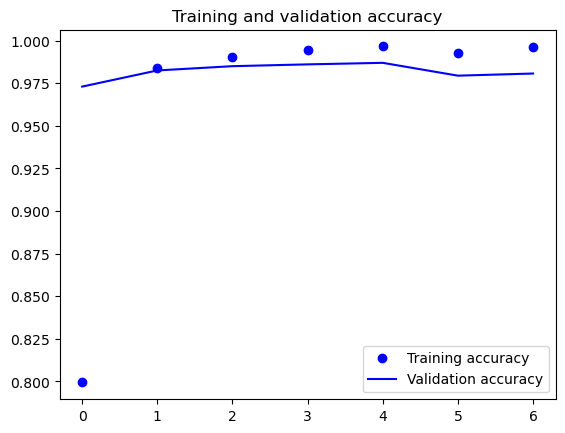

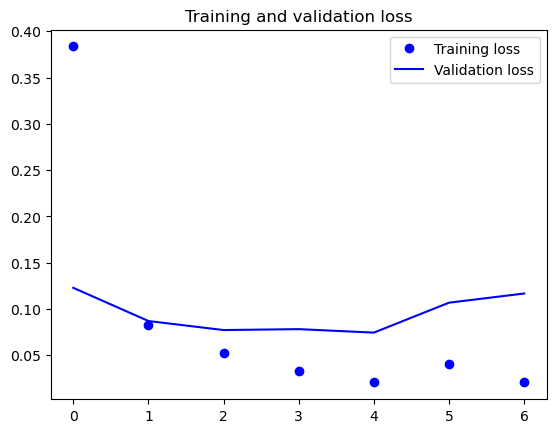

In [104]:
# Create plots of loss and accuracy for the training and validation sets to determine performance:

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('accuracy_curves.jpg')
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('loss_curves.jpg')
plt.show()



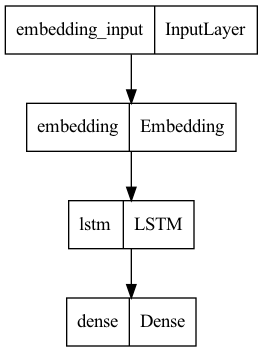

In [105]:
# Import libraries to visualise the model architecture:

from tensorflow.keras.utils import plot_model
import pydot
import graphviz

# Plot the model and save to a png:

plot_model(model, to_file='model.png')


In [117]:
# Run this code with the filename to output notebook to PDF:
!jupyter nbconvert --to webpdf --allow-chromium-download Fake_News_Analysis_and_Classifier.ipynb

[NbConvertApp] Converting notebook Fake_News_Analysis_and_Classifier.ipynb to webpdf
[NbConvertApp] Building PDF
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 1127729 bytes to Fake_News_Analysis_and_Classifier.pdf
